#                                          Diabetes Prediction using KNN

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KDTree
from sklearn.metrics import accuracy_score,confusion_matrix

In [35]:
df=pd.read_csv("diabetes.csv")

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
df.shape

(768, 9)

In [38]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


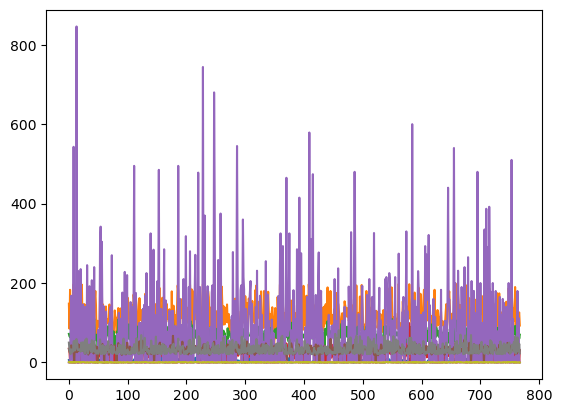

In [41]:
plt.plot(df)
plt.show() #checking the data distribution

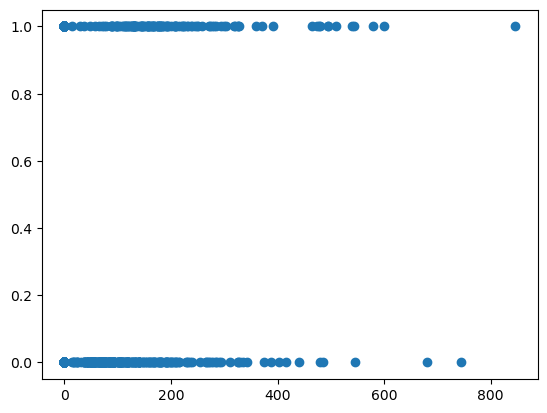

In [42]:
plt.scatter(df['Insulin'],df['Outcome'])
plt.show()

In [43]:
X=df.iloc[:,:-1]

In [44]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [45]:
y=df.iloc[:,-1]

In [46]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
X_train.shape

(614, 8)

In [49]:
X_test.shape

(154, 8)

In [50]:
scaler=StandardScaler()

In [51]:
X_train=scaler.fit_transform(X_train)

In [52]:
X_train

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [53]:
scaled_X_train.mean()

-3.797179725916659e-17

In [54]:
scaled_X_train.std()

1.0

In [55]:
X_test=scaler.transform(X_test)

In [56]:
X_test.std()

1.06887872449587

In [57]:
knn=KNeighborsClassifier()

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:
pred=knn.predict(X_test)

In [60]:
print(accuracy_score(y_test,pred))

0.6948051948051948


In [61]:
print(confusion_matrix(y_test,pred))

[[79 20]
 [27 28]]


In [68]:
#To get the value of K we use the sqrt of number of datatpoints
import math
math.sqrt(len(X_test))

12.409673645990857

In [93]:
knn=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [94]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [95]:
pred=knn.predict(X_test)

In [96]:
print(accuracy_score(y_test,pred))

0.7077922077922078


In [97]:
print(confusion_matrix(y_test,pred))

[[78 21]
 [24 31]]


In [98]:
tree = KDTree(X, leaf_size=2)

In [104]:
tree

In [100]:
dist, ind = tree.query(X[:1], k=3) 

In [101]:
print(dist) #distances

[[ 0.         10.55811801 17.94478557]]


In [102]:
print(ind) #indices of the data points 

[[  0 754 417]]


In [103]:
X[:1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [113]:
from sklearn.neighbors import NearestNeighbors

In [114]:
nbrs = NearestNeighbors(n_neighbors=11).fit(X) #finding the nearest neighbors
distances, indices = nbrs.kneighbors(X)
indices

array([[  0, 754, 417, ..., 761, 479, 263],
       [  1, 253, 218, ..., 240, 463, 262],
       [  2, 317, 327, ..., 192,  44, 235],
       ...,
       [765, 384, 477, ..., 651, 530, 704],
       [766, 264, 246, ..., 167, 131, 116],
       [767, 262,  96, ..., 629, 163, 501]], dtype=int64)

In [117]:
distances

array([[ 0.        , 10.55811801, 17.94478557, ..., 25.8884178 ,
        25.93073975, 26.0695671 ],
       [ 0.        , 11.64700687, 11.68426844, ..., 13.10668841,
        14.38779514, 14.6054141 ],
       [ 0.        , 13.67285373, 14.84798922, ..., 25.44589399,
        25.65059227, 25.92541705],
       ...,
       [ 0.        ,  8.34329527, 10.76145162, ..., 16.69756991,
        17.09335497, 17.4601297 ],
       [ 0.        , 13.02402123, 14.07900142, ..., 16.68471156,
        17.40187418, 17.66993608],
       [ 0.        ,  4.24007182,  8.80194439, ..., 12.34981332,
        12.42951363, 12.69812207]])

In [130]:
X.iloc[754]

Pregnancies                   8.000
Glucose                     154.000
BloodPressure                78.000
SkinThickness                32.000
Insulin                       0.000
BMI                          32.400
DiabetesPedigreeFunction      0.443
Age                          45.000
Name: 754, dtype: float64

In [131]:
X.iloc[417]

Pregnancies                   4.000
Glucose                     144.000
BloodPressure                82.000
SkinThickness                32.000
Insulin                       0.000
BMI                          38.500
DiabetesPedigreeFunction      0.554
Age                          37.000
Name: 417, dtype: float64

In [147]:
y.at[754] #checking the target value at the 754 th index

1

In [133]:
y.at[417]

1

In [145]:
y[:1] #target at index 1

0    1
Name: Outcome, dtype: int64

In [138]:
pred[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [141]:
knn.predict([[4,125,70,32,0,35,0.55,39]]) # new datapoint 

array([1], dtype=int64)